## Язык Python. Урок 4

Перколяция\
Перколяция — модель протекания жидкости через пористую среду или
проводимости случайной среды. Рассмотрим матрицу nхn, заполненную 0 и 1
случайным образом, причем элемент матрицы равен 1 с вероятностью р и 0 с
вероятностью (1 — р). Будем считать, что две единицы стоят рядом, если они
находятся в соседних клетках в одном ряду или столбце (единицы,
расположенные по диагонали не считаются стоящими рядом). Так единицы
могут образовывать группы в матрице, такие группы называют кластерами.
Если в матрице существует кластер, соединяющий первый и последний
столбцы матрицы, то будем называть такую матрицу проводящей, а кластер -
стягивающим. Если сгенерировать матрицу с определенным значением р, она
может быть как проводящей, так и непроводящей, но очевидно, что чем
больше р, тем выше вероятность того, что матрица будет проводящей. При
определенном значении вероятности р, практически все матрицы станут
проводящими. Можно показать, что при n, стремящемся к бесконечности,
значение вероятности рс станет вполне определенным, это значение называют
порогом перколяции.


In [2]:
import matplotlib.pyplot as plt
from collections import deque
from random import random
import pandas as pd
import numpy as np
import timeit
import copy

Напишите функцию, которая генерирует матрицу nxn из 0 и 1 с
заданным значением вероятности p. Входные параметры: n, p.
Возвращаемые параметры: сгенерированная матрица.

In [15]:
# Генерация матрицы
def matrixGen(n, p):
    row = np.array('')
    matrix=[]
    for i in range(n):
        row = np.random.choice(2, n, p=[1 - p, p])
        matrix.append(row)
    return np.array(matrix)

In [ ]:
# Альтернативная генерация матрицы
def matrixGenShort(n, p):
    return [[1 if random() < p else 0 for col in range(n)] for row in range(n)]

In [ ]:
def matrixGen(n, p):
    return [random.choices([0, 1], weights = [1 - p, p], k = n) for row in range(n)]

In [ ]:
def matrixGen(n, p):
    return np.random.choice([0, 1], size = (n, n), p = [1 - p, p])

Дополнительный вопрос

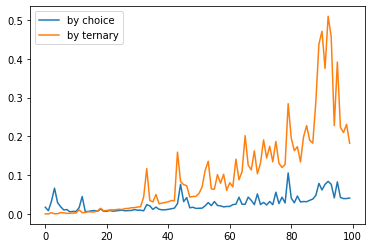

In [ ]:
timeGen = []
timeGenShort = []
sizes = 100
for n in range(sizes):
  timeGen.append(timeit.timeit('matrixGen(n, 0.5)', globals=globals(), number = 100))
  timeGenShort.append(timeit.timeit('matrixGenShort(n, 0.5)', globals=globals(), number = 100))

plt.plot([i for i in range(sizes)], timeGen, label='by choice')
plt.plot([i for i in range(sizes)], timeGenShort, label='by ternary')
plt.legend()
plt.show()

Напишите функцию визуализации системы: построение сетки, узлов и
всех кластеров. Стягивающие кластеры выделить красным цветом.

In [16]:
# Генерация сетки и доступных для движения точек
def matrixPlot(matrix, pathes):
    plt.rcParams["figure.figsize"] = (8, 8)

    # Grid
    X = []
    Y = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            X.append(i)
            Y.append(j)
    plt.scatter(X, Y, color = 'gray')

    # Points
    X = []
    Y = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (matrix[i][j] == 1):
                X.append(i)
                Y.append(j)
    plt.scatter(X, Y, color = 'blue')

    # Lines
    X = []
    Y = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (matrix[i][j] == 1) and (i < len(matrix) - 1):
                if (matrix[i + 1][j] == 1):
                    point1 = [i, j]
                    point2 = [i + 1, j]
                    x_values = [point1[0], point2[0]]
                    y_values = [point1[1], point2[1]]
                    plt.plot(x_values, y_values, 'bo', linestyle="-")
            if (matrix[i][j] == 1) and (j < len(matrix[0]) - 1):
                if (matrix[i][j + 1] == 1):
                    point1 = [i, j]
                    point2 = [i, j + 1]
                    x_values = [point1[0], point2[0]]
                    y_values = [point1[1], point2[1]]
                    plt.plot(x_values, y_values, 'bo', linestyle="-")
    
    # Pathes
    for i in range(len(pathes)):
            matrixColorLine(pathes[i])
    
    plt.show()

In [17]:
def matrixColorLine(path):
    for i in range(len(path) - 1):
        x_values = [path[i][0], path[i + 1][0]]
        y_values = [path[i][1], path[i + 1][1]]
        plt.plot(x_values, y_values, color = 'r')
        #plt.arrow(path[i][0], path[i][1], path[i + 1][0] - path[i][0], path[i + 1][1] - path[i][1], head_width=0.1, head_length=0.2, color = 'r')

In [20]:
matrix = matrixGen(8, 0.6)
print(matrix)

[[1 1 1 1 0 1 1 1]
 [0 1 1 1 1 0 1 1]
 [0 1 1 0 1 1 1 1]
 [0 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 0 1]
 [1 0 0 1 1 0 0 1]
 [0 1 1 0 1 1 0 1]
 [1 0 1 1 1 0 1 0]]


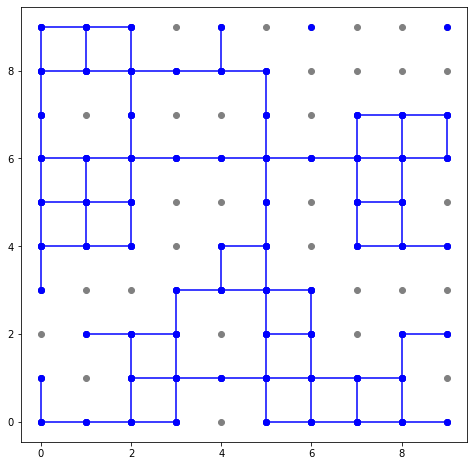

In [8]:
matrixPlot(matrix, [])

Напишите функцию, которая проверяет, является ли данная матрица
проводящей. Обязательный входной параметр - матрица М. Функция
должна возвращать True, если матрица проводящая, или False в
обратном случае.

In [28]:
# Перебор старотовых точек
def matrixFindWay(matrix):
    row = len(matrix)
    col = len(matrix[0])
    pathes = []
    for i in range(col):
        result = rec(0, i, row, col, matrix, [], pathes)
    if (len(pathes) > 0):
        #matrixPlot(matrix, pathes)
        # for i in range(len(pathes)):
        #     print(pathes[i])
        return True
    else:
        return False

In [26]:
# Рекурсивный поиск пути
def rec(x, y, row, col, matrix, path, pathes):
    path.append([x, y])
    path1 = copy.deepcopy(path)
    path2 = copy.deepcopy(path)
    path3 = copy.deepcopy(path)
    path4 = copy.deepcopy(path)

    if (x == row - 1):
        pathes.append(path)
        return None

    if (x < 0 or y < 0 or x > row or y > col or matrix[x][y] != 1):
        path.pop()
        return None
    if (x < row - 1) and (matrix[x + 1][y] == 1) and (path.count([x + 1, y]) == 0):
        rec(x + 1, y, row, col, matrix, path1, pathes)
    if (x > 0) and (matrix[x - 1][y] == 1) and (path.count([x - 1, y]) == 0):
        rec(x - 1, y, row, col, matrix, path2, pathes)
    if (y < col - 1) and (matrix[x][y + 1] == 1) and (path.count([x, y + 1]) == 0):
        rec(x, y + 1, row, col, matrix, path3, pathes)
    if (y > 0) and (matrix[x][y - 1] == 1) and (path.count([x, y - 1]) == 0):
        rec(x, y - 1, row, col, matrix, path4, pathes)

In [29]:
matrixFindWay(matrix)

True

Напишите функцию, которая вычисляет вероятность проводимости Pcond
матрицы в зависимости от вероятности p в заданном числе 
экспериментов k. Входные параметры: n, p, k. Функция должны 
возвращать число – вероятность проводимости Pcond.

In [ ]:
def matrixConduction(n, p, k):
    positive = 0
    for i in range(k):
        matrix = matrixGen(n, p)
        if matrixFindWay(matrix):
            positive += 1
    return positive/k

In [ ]:
matrixConduction(10, 0.5, 50)

0.16

Алгоритм находящий все пути для решения такой задачи не нужен, ведь достаточно знать есть ли путь вообще. Поэтому заменим рекрсивный алгоритм на поиск в ширину

In [ ]:
# Перебор старотовых точек
def matrixBFS(matrix):
    row = len(matrix)
    col = len(matrix[0])
    for i in range(col):
        for j in range(col):
            if matrix[0][i]:
                if BFS([0, i], [row - 1, j], makeGraph(matrix)):
                    return True
    return False

In [ ]:
# Нахождение соседей
def getNextNodes(x, y, matrix):
    checkNextNode = lambda x, y, matrix: True if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] else False
    ways = [-1, 0], [0, -1], [1, 0], [0, 1]
    return [(x + dx, y + dy) for dx, dy in ways if checkNextNode(x + dx, y + dy, matrix)]

In [ ]:
# Сделаем словарь в котором ключем является точка, а значением ее соседи
def makeGraph(matrix):
    graph = {}
    for y, row in enumerate(matrix):
        for x, col in enumerate(row):
            if matrix[x][y]:
                graph[(x, y)] = graph.get((x, y), []) + getNextNodes(x, y, matrix)
    return graph

In [ ]:
# Сам алгоритм
def BFS(start, goal, graph):
    start = tuple(start)
    goal = tuple(goal)
    queue = deque([start])
    visited = {start: None}
    currentNode = start

    while queue:
        currentNode = queue.popleft()
        if currentNode == goal:
            return True

        nextNodes = graph[currentNode]
        for nextNode in nextNodes:
            if nextNode not in visited:
                queue.append(nextNode)
                visited[nextNode] = currentNode
    return False

Постройте зависимость вероятности проводимости матрицы размера n = 
10, 15, 20 от p. При этом сделайте 2 отдельные программы: первая делает 
расчет вероятности проводимости для разных значений n и сохраняет 
данные в файл, вторая строит графики по сохраненным данным. 
Найдите пороговое значение проводимости

In [ ]:
def matrixDependence(n, tests, steps):
    positive = 0
    probability = []
    lst = []
    for i in n:
        for j in np.linspace(0, 1, steps + 1):
            for k in range(tests):
                matrix = matrixGen(i, j)
                if matrixBFS(matrix):
                    positive += 1
            lst.append(positive/tests)
            positive = 0
        probability.append(lst)
        lst = []
    return probability

In [ ]:
martixSizes = [10, 15, 20]
steps = 100
tests = 50
data = matrixDependence(martixSizes, tests, steps)

In [ ]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Пороговые значения

In [ ]:
def matrixBias(data, matrixSizes, tests, steps):
    bias = []
    for i in range(len(martixSizes)):
        flag = False
        for j in range(len(data[0])):
            if (data[i][j] == 1 and flag == False):
                flag = True
                bias.append(j/steps)
    return bias

In [ ]:
df.to_csv('plotData.csv')

In [ ]:
def matrixPlot(data):
    for i in range(3):
        plt.plot(np.linspace(0, 1, df.shape[1]), data[i], label='n ={}'.format(str(10+i*5)))
    plt.scatter(matrixBias(data, martixSizes, tests, steps), [1, 1, 1], color = 'r')
    plt.legend()
    plt.show()

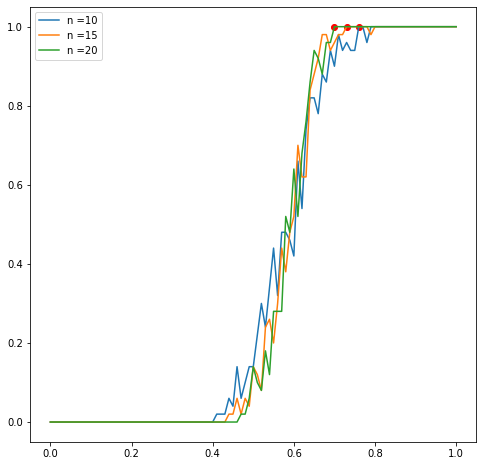

In [ ]:
matrixPlot(data)

In [ ]:
def dataFramePlot():
    plotData = pd.read_csv(r'plotData.csv')
    for i in range(3):
            plt.plot(np.linspace(0, 1, 101), list(plotData.iloc[i])[1:], label='n ={}'.format(str(10+i*5)))
    plt.scatter(matrixBias(data, martixSizes, tests, steps), [1, 1, 1], color = 'r')
    plt.legend()
    plt.show()

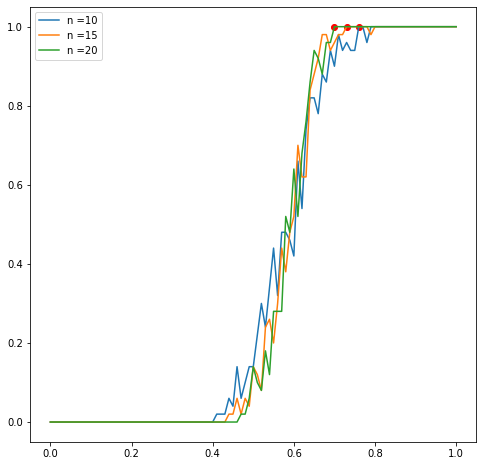

In [ ]:
dataFramePlot()